In [56]:
from keras import models, layers, optimizers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil

In [57]:
#Load train and test data as dataframes 
train_dataset = pd.read_csv('./dataset/train.csv')
test_dataset = pd.read_csv('./dataset/test.csv')

print("Length of training data is: ", train_dataset.shape[0])
print("Length of testing data is: ", test_dataset.shape[0])

#debug purpose.
#print("\nSummary of first 10 rows of train data:")
#train_dataset.head(10)

Length of training data is:  3662
Length of testing data is:  1928


In [58]:
validation_dataset =train_dataset.iloc[:1200,:]
print(validation_dataset.shape[0])

#debug purpose.
#print(validation_dataset)

train_dataset = train_dataset.iloc[1200:,:]
print(train_dataset.shape[0])

#debug purpose.
#print(train_dataset)

1200
2462


In [59]:
#split the training data into the 5 respective classes using the diagnosis variable from the training data.
class_train = []
class_val = []

for i in range(5):
    class_train.append(train_dataset[train_dataset['diagnosis'] == i]['id_code'].tolist())
    class_val.append(validation_dataset[validation_dataset['diagnosis'] == i]['id_code'].tolist())

#concatenate .png extension at the end of each id to use this as a filename.
class_train = [[file_id + '.png' for file_id in class_n] for class_n in class_train]
class_val = [[file_id + '.png' for file_id in class_n] for class_n in class_val]

for i,class_n in enumerate(class_train):
    print("Length of training data in class ",i,":", len(class_n))

print("")

for i,class_n in enumerate(class_val):
    print("Length of validation data in class ",i,":", len(class_n))

[['002c21358ce6.png', '005b95c28852.png', '0097f532ac9f.png', '00cc2b75cddd.png', '00f6c1be5a33.png', '0125fbd2e791.png', '014508ccb9cb.png', '0151781fe50b.png', '0182152c50de.png', '01d9477b1171.png', '01f7bb8be950.png', '0212dd31f623.png', '022f820027b8.png', '0231642cf1c2.png', '0232dfea7547.png', '02358b47ea89.png', '02cd34a85b24.png', '02da652c74b8.png', '0304bedad8fe.png', '03b373718013.png', '0423237770a7.png', '04579e31e4be.png', '04aef84a2cc1.png', '04efb1a284cc.png', '050bb1eafa76.png', '05113073b268.png', '05195a3db5e2.png', '05339950962e.png', '054b1b305160.png', '0551676cc2aa.png', '05b1bb2bdb81.png', '05e9126dfa5c.png', '060e00d1e2ab.png', '06586082a24d.png', '06be1092a062.png', '0709652336e2.png', '070d4ce5fd90.png', '07596907347b.png', '0773a1c326ad.png', '07751b94a88a.png', '0790515cf5af.png', '07a0be6b347f.png', '07a2b8cabf6b.png', '07e827469099.png', '07f5d7baf907.png', '08037e4490e5.png', '084c02cf077f.png', '0851d6a69589.png', '08b6e3240858.png', '08bef347f40d.png'

In [105]:
#original path to images directory
train_dataset_dir = './dataset/train_images/'
test_dataset_dir = './dataset/test_images/'

#new directory
new_dataset_dir = './new_dataset/'

train_dir = os.path.join(new_dataset_dir, 'train')
#create new directories for the labelled training data we have.
for i in range(5):
    new_folder = os.path.join(train_dir, 'class' + str(i))
    os.makedirs(new_folder, exist_ok=True)

#create a copy of our training images to the new directories.
for i in range(5):
    for file_id in class_train[i]:
        src = os.path.join(train_dataset_dir, file_id)
        dst = os.path.join(train_dir, 'class' +  str(i), file_id)
        shutil.copy(src, dst)

val_dir= os.path.join(new_dataset_dir, 'val')
#create new directories for the labelled validation data we have.
for i in range(5):
    new_folder = os.path.join(val_dir, 'class' + str(i))
    os.makedirs(new_folder, exist_ok=True)

#create a copy of our validation images to the new directories.
for i in range(5):
    for file_id in class_val[i]:
        src = os.path.join(train_dataset_dir, file_id)
        dst = os.path.join(val_dir, 'class' +  str(i), file_id)
        shutil.copy(src, dst)

Class: [0] Height: 1050 Width: 1050
Class: [1] Height: 1958 Width: 2588
Class: [2] Height: 1226 Width: 1844
Class: [3] Height: 1944 Width: 2896
Class: [4] Height: 1958 Width: 2588


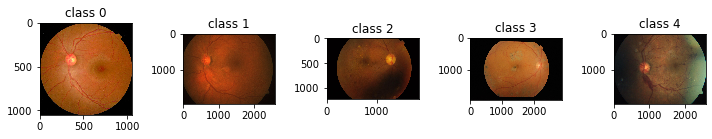

In [108]:
#import necessary libraries:
import skimage.io
import matplotlib.pyplot as plt

#Load the image into the workspace
new_dataset_dir = './new_dataset/train/'
fig=plt.figure(figsize=(10,7))
rows=1
columns=5
#create new directories for the labelled training data we have.
for i in range(5):
    folder_path = os.path.join(new_dataset_dir, 'class' + str(i)+"/")
    Image_Id=os.listdir(folder_path)[i]
    Image_cat=folder_path+Image_Id
    image = skimage.io.imread(Image_cat)
    fig.add_subplot(rows,columns,i+1)
    skimage.io.imshow(image)
    plt.title("class "+ str(i))
    print("Class:",[i],"Height:", image.shape[0], "Width:", image.shape[1])




In [ ]:
#Build model with convolution layers, pooling, and normalization
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))
print(model.summary())